<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Fitbit_Activity_2023_06_27_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Function

In [1]:
!pip install imbalanced-learn
!pip install pyswarms

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)



def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 10.0 MB/s eta 0:00:00


#Starting

In [2]:
import numpy as np
import pandas as pd
#dataset=pd.read_csv("/content/drive/MyDrive/Sleep Stage XAI/EEG_HMC_FeatureExtraction_2023.01.19.csv")
#dataset=pd.read_excel("/content/EEG_CNU_Control_Resting, walking, working and Reading_2023.01.07.xlsx")

#dataset=pd.read_csv("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Fitbit_feature_merged_version_2023.06.26_ST-II&ST-V_Pre.csv")

dataset = pd.read_csv("/content/Fitbit_feature_merged_version_2023.06.26_ST-II&ST-V_Pre.csv")

target = "Activity"
result = {}

In [3]:
dataset.head()

,Subject,Condition,Activity,Epoch Duration(min),Epoch,ST-II Max. Increase,ST-II Max. decrease,ST-II Max-Min Difference,ST-V Max. Increase,ST-V Max. decrease,...,ar_norm_high,ar_ratio,ar_total,sd1,sd2,sd_ratio,ellipse_area,sampen,dfa_alpha1,dfa_alpha2
0,002-JR,pre,Light,10,1,0.2,0.3,0.5,0.3,0.1,...,64.958716,0.539439,19105.45764,6.012997,19.842689,3.299967,374.836049,1.022451,1.470755,0.573684
1,002-JR,pre,Light,10,10,0.2,0.3,0.5,0.3,0.1,...,64.912631,0.540532,18856.43483,6.145682,21.024745,3.421060,405.929592,1.240787,1.234339,1.042289
2,002-JR,pre,Light,10,11,0.2,0.3,0.5,0.3,0.1,...,64.805043,0.543090,19193.83257,6.782934,22.110565,3.259735,471.158801,0.924949,NaN,NaN
3,002-JR,pre,Light,10,12,0.2,0.3,0.5,0.3,0.1,...,64.862213,0.541730,19039.04728,8.357614,28.930985,3.461632,759.618229,1.043804,1.534029,1.049467
4,002-JR,pre,Light,10,13,0.2,0.3,0.5,0.3,0.1,...,65.007546,0.538283,18767.08842,9.978556,44.186165,4.428112,1385.172625,1.504077,1.542662,0.948630


In [4]:
dataset.shape

(2878, 84)

Removing NULL values

In [13]:
dataset.dropna(axis=0, how='any', inplace = True)
dataset = dataset.reset_index(drop=True)

Observing shape of dataset

In [14]:
dataset.shape

(2629, 84)

target value count

In [5]:
dataset[target].value_counts()

Light       2288
Extreme      325
Moderate     150
Heavy        115
Name: Activity, dtype: int64

In [6]:
set(list(dataset[target]))

{'Extreme', 'Heavy', 'Light', 'Moderate'}

Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [15]:
set(list(dataset[target]))

{0, 1, 2, 3}

###Spliting into X and y

In [16]:
X = dataset.iloc[:,11:]

y = dataset[target]

X.head(10)


,nni_counter,nni_mean,nni_min,nni_max,hr_mean,hr_min,hr_max,hr_std,nni_diff_mean,nni_diff_min,...,ar_norm_high,ar_ratio,ar_total,sd1,sd2,sd_ratio,ellipse_area,sampen,dfa_alpha1,dfa_alpha2
0,65,779.015385,740,810,77.047607,74.074074,81.081081,1.459607,6.078125,0,...,64.958716,0.539439,19105.45764,6.012997,19.842689,3.299967,374.836049,1.022451,1.470755,0.573684
1,65,703.938462,666,740,85.275756,81.081081,90.090090,1.890121,7.453125,0,...,64.912631,0.540532,18856.43483,6.145682,21.024745,3.421060,405.929592,1.240787,1.234339,1.042289
2,66,774.393939,731,833,77.537793,72.028812,82.079343,2.133033,9.107692,0,...,64.862213,0.541730,19039.04728,8.357614,28.930985,3.461632,759.618229,1.043804,1.534029,1.049467
3,77,762.038961,697,821,78.878037,73.081608,86.083214,3.387898,10.381579,0,...,65.007546,0.538283,18767.08842,9.978556,44.186165,4.428112,1385.172625,1.504077,1.542662,0.948630
4,72,688.861111,652,731,87.146588,82.079343,92.024540,2.014072,7.098592,0,...,64.868522,0.541580,18800.46155,6.527922,21.178959,3.244365,434.339619,1.376244,1.358871,0.791963
5,72,735.500000,697,800,81.660141,75.000000,86.083214,2.589556,7.929577,0,...,64.795921,0.543307,18778.69359,7.778589,32.874130,4.226233,803.350301,1.712979,1.579461,0.753810
6,66,743.106061,681,789,80.820900,76.045627,88.105727,2.573095,6.615385,0,...,64.784223,0.543586,18906.56635,6.443601,31.820584,4.938323,644.149531,1.029619,1.548781,0.602646
7,72,642.000000,612,674,93.517353,89.020772,98.039216,2.372689,5.971831,0,...,64.778278,0.543727,18563.27065,5.375892,21.911972,4.075969,370.068303,1.252763,1.407493,-0.192170
8,72,655.638889,582,697,91.598758,86.083214,103.092783,2.891687,6.211268,0,...,65.099660,0.536106,18641.14134,7.500777,26.517596,3.535313,624.870861,1.134980,1.640218,0.796802
9,75,681.346667,618,714,88.188794,84.033613,97.087379,3.439274,7.148649,0,...,64.914935,0.540478,18613.09652,6.361041,35.605096,5.597370,711.525070,1.293921,1.492883,2.042574


###USing SMOTE for balancing

In [17]:
new_dataset =  balance(X,y)

In [18]:
new_dataset[target].value_counts()

2    2048
3    2048
0    2048
1    2048
Name: Activity, dtype: int64

#Feature Selection

In [19]:
number_of_feat = 30
number_of_feat2 = 70

###ANOVA with f classifciation

In [20]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd



fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_ANOVA']

lyst = featureScores.nlargest(number_of_feat,'Score_ANOVA')

#lyst.to_csv('Filter_Method_ANOVA_with_f_classif.csv')

list_of_feat1 = list(lyst["Best_columns"])

###Embedded Method

In [ ]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()

list_of_feat2=[]


for i in range(coef.shape[0]):
  if coef[i]!=0:
    list_of_feat2.append(dataset.iloc[:0,i+3].name)

df = pd.DataFrame(list_of_feat2, columns=['Best_Features'])

#df.to_csv("Embedded_Method.csv")

list_of_feat2 = list(df["Best_Features"])
if number_of_feat2 < len(list_of_feat2):
  list_of_feat2 = list_of_feat2[:number_of_feat2]


Best alpha using built-in LassoCV: 0.534774
Best score using built-in LassoCV: 0.563498
Lasso picked 13 variables and eliminated the other 60 variables


###Pearson's with f regression

In [ ]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import pandas as pd


fs = SelectKBest(score_func=f_regression, k=5)
fit = fs.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dataset.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_pearsons']


lyst = featureScores.nlargest(number_of_feat,'Score_pearsons')

#lyst.to_csv('Filter_Method_Pearson’s_with_f_regression.csv')

list_of_feat3 = list(lyst["Best_columns"])


###Sequential Feature Selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)
sfs.fit(X, y)
list_of_feat4=[]
list_of_feat4=list(sfs.get_feature_names_out(X.columns))

df = pd.DataFrame(list_of_feat4, columns=['Best_Features'])

#df.to_csv("Filter_Method_Sequential_feat_Selection_KNN.csv")

list_of_feat4 = list(df["Best_Features"])
if number_of_feat < len(list_of_feat4):
  list_of_feat4 = list_of_feat4[:number_of_feat]


###All features

In [ ]:
list_of_feat5 = list(X.columns)

###Feature list

In [ ]:
dfcolumns = pd.DataFrame(list_of_feat2)
print(dfcolumns)

                      0
0   ST-II Max. Increase
1   ST-II Max. decrease
2    ST-V Max. decrease
3               nni_min
4          nni_diff_max
5                  sdnn
6                 pnn20
7                tinn_n
8          fft_log_high
9          fft_norm_low
10        fft_norm_high
11      lomb_rel_medium
12          ar_log_high


#Data Spliting

In [21]:
X_new = new_dataset[list_of_feat1]
y_new = new_dataset[target]

In [22]:
X_new.shape

(8192, 30)

In [ ]:
y_new.shape

(8192,)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)



---



# **Training**



---



#ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[343  43   4   5]
 [107 238  40  34]
 [  2  34 166 213]
 [  3  45 100 262]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       395
           1       0.66      0.57      0.61       419
           2       0.54      0.40      0.46       415
           3       0.51      0.64      0.57       410

    accuracy                           0.62      1639
   macro avg       0.62      0.62      0.61      1639
weighted avg       0.61      0.62      0.61      1639

Accurecy:  0.6156192800488103


1/10 round completed......................... Accurecy: 0.4106162294081757
2/10 round completed......................... Accurecy: 0.5930445393532642
3/10 round completed......................... Accurecy: 0.6217205613178768
4/10 round completed......................... Accurecy: 0.5973154362416108
5/10 round completed......................... Accurecy: 0.6052471018913972
6/10 round completed......................... Accurecy: 0.6119585112873703
7/10 round completed......................... Accurecy: 0.5668090298962782
8/10 round completed......................... Accurecy: 0.5668090298962782
9/10 round completed......................... Accurecy: 0.6040268456375839
10/10 round completed......................... Accurecy: 0.5558267236119585
The best n_estimators:
3


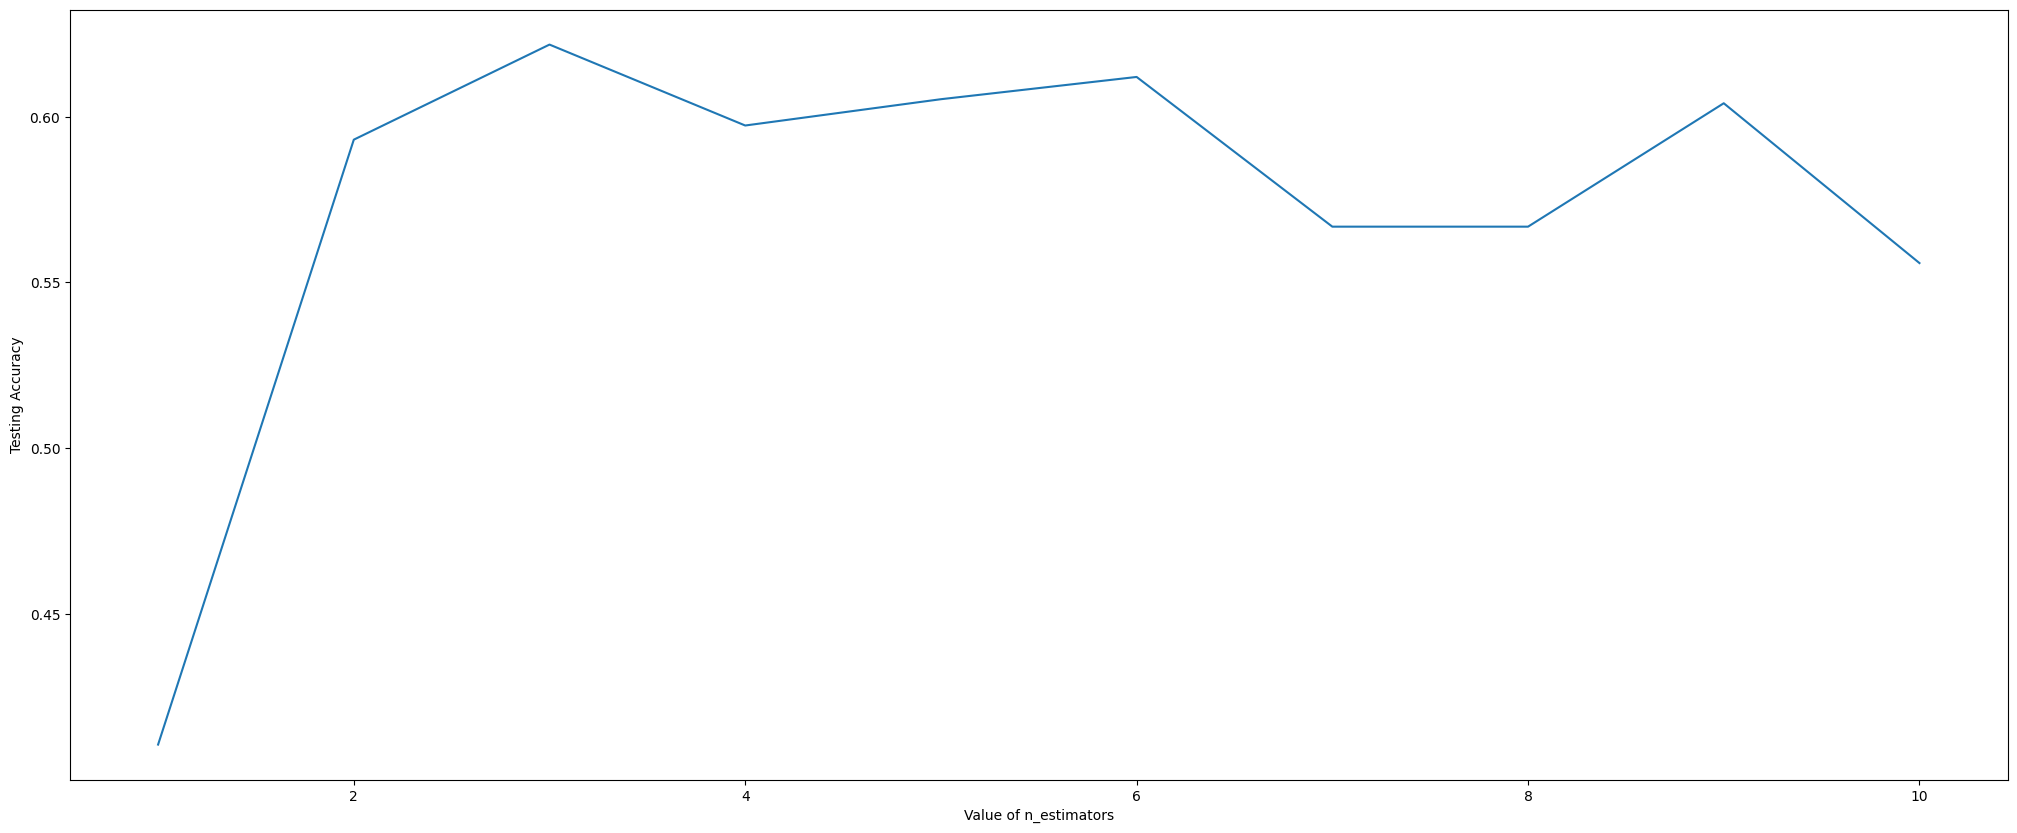

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
N=10
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[263 124   3   5]
 [ 10 337  54  18]
 [  0  43 344  28]
 [  0  97 238  75]]
              precision    recall  f1-score   support

           0       0.96      0.67      0.79       395
           1       0.56      0.80      0.66       419
           2       0.54      0.83      0.65       415
           3       0.60      0.18      0.28       410

    accuracy                           0.62      1639
   macro avg       0.66      0.62      0.60      1639
weighted avg       0.66      0.62      0.59      1639

Accurecy:  0.6217205613178768




---



---



#Graddient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[364  26   1   4]
 [  8 384   8  19]
 [  1  25 348  41]
 [  1   9  22 378]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       395
           1       0.86      0.92      0.89       419
           2       0.92      0.84      0.88       415
           3       0.86      0.92      0.89       410

    accuracy                           0.90      1639
   macro avg       0.90      0.90      0.90      1639
weighted avg       0.90      0.90      0.90      1639

Accurecy:  0.8993288590604027


1/25 round completed......................... Accurecy: 0.6985967053081147
2/25 round completed......................... Accurecy: 0.7010372178157414
3/25 round completed......................... Accurecy: 0.7144600366076876
4/25 round completed......................... Accurecy: 0.7309334960341671
5/25 round completed......................... Accurecy: 0.726052471018914
6/25 round completed......................... Accurecy: 0.7297132397803539
7/25 round completed......................... Accurecy: 0.7394752898108603
8/25 round completed......................... Accurecy: 0.7388651616839537
9/25 round completed......................... Accurecy: 0.7559487492373398
10/25 round completed......................... Accurecy: 0.7589993898718731
11/25 round completed......................... Accurecy: 0.7681513117754728
12/25 round completed......................... Accurecy: 0.773032336790726
13/25 round completed......................... Accurecy: 0.7779133618059793
14/25 round completed..

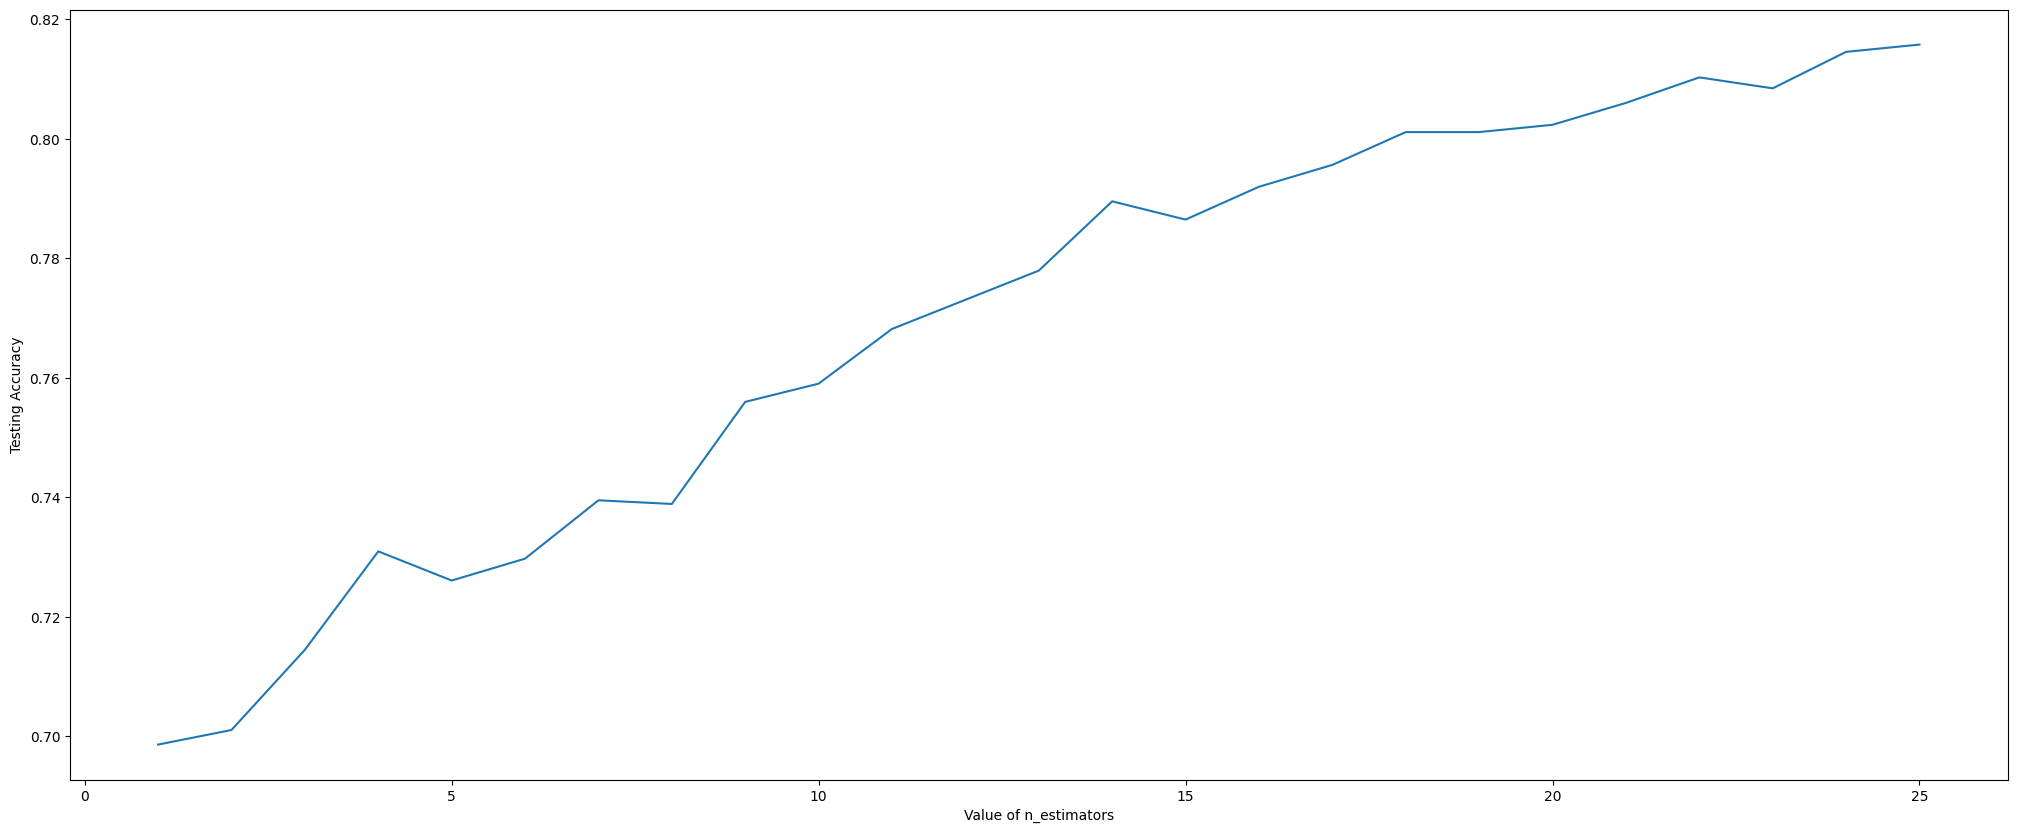

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=25
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/10 round completed......................... Accurecy: 0.7547284929835265
2/10 round completed......................... Accurecy: 0.8462477120195241
3/10 round completed......................... Accurecy: 0.8993288590604027
4/10 round completed......................... Accurecy: 0.9426479560707749
5/10 round completed......................... Accurecy: 0.9505796217205613
6/10 round completed......................... Accurecy: 0.9560707748627212
7/10 round completed......................... Accurecy: 0.9603416717510678
8/10 round completed......................... Accurecy: 0.9627821842586943
9/10 round completed......................... Accurecy: 0.9646125686394142
10/10 round completed......................... Accurecy: 0.9658328248932275
The best Depth:
10


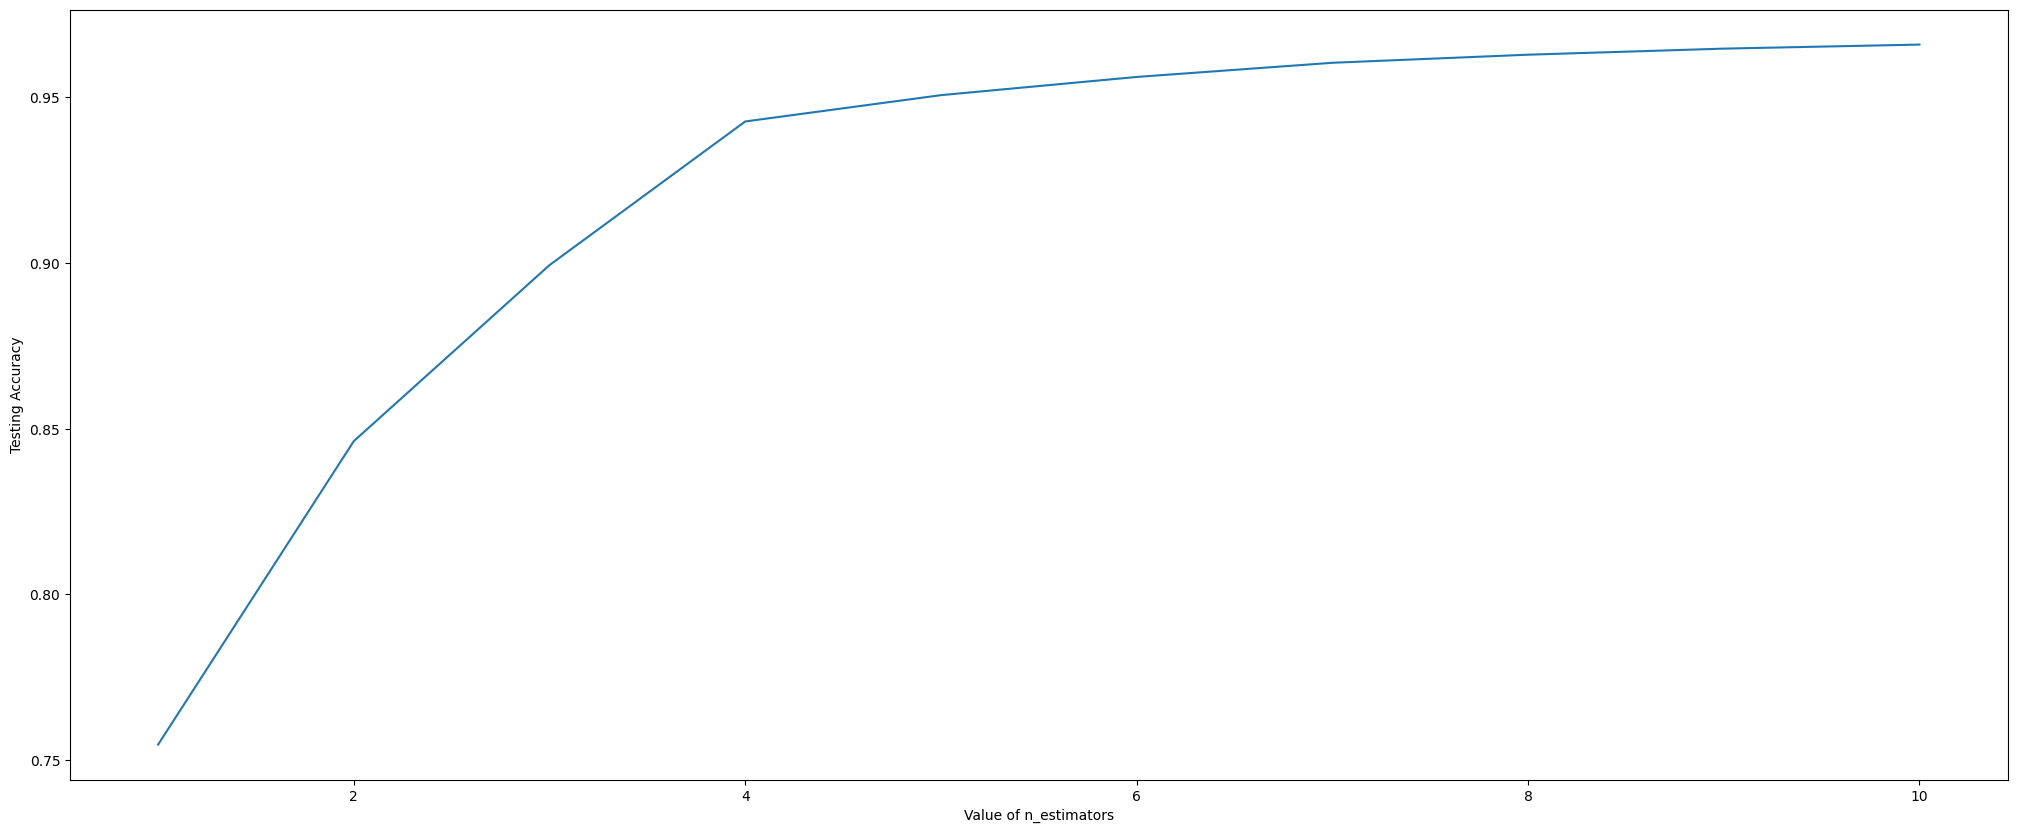

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=10
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[335  55   1   4]
 [ 20 350  14  35]
 [  2  37 317  59]
 [  0  35  40 335]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       395
           1       0.73      0.84      0.78       419
           2       0.85      0.76      0.81       415
           3       0.77      0.82      0.79       410

    accuracy                           0.82      1639
   macro avg       0.82      0.82      0.82      1639
weighted avg       0.82      0.82      0.82      1639

Accurecy:  0.8157413056741916


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[384   8   1   2]
 [  2 412   4   1]
 [  1   8 383  23]
 [  0   2   4 404]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       395
           1       0.96      0.98      0.97       419
           2       0.98      0.92      0.95       415
           3       0.94      0.99      0.96       410

    accuracy                           0.97      1639
   macro avg       0.97      0.97      0.97      1639
weighted avg       0.97      0.97      0.97      1639

Accurecy:  0.9658328248932275


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[375  17   2   1]
 [  3 405   4   7]
 [  2  12 372  29]
 [  0   4  12 394]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       395
           1       0.92      0.97      0.95       419
           2       0.95      0.90      0.92       415
           3       0.91      0.96      0.94       410

    accuracy                           0.94      1639
   macro avg       0.94      0.94      0.94      1639
weighted avg       0.94      0.94      0.94      1639

Accurecy:  0.9432580841976815




---



---



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[385   8   1   1]
 [  3 411   4   1]
 [  1  13 381  20]
 [  0   2   6 402]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       395
           1       0.95      0.98      0.96       419
           2       0.97      0.92      0.94       415
           3       0.95      0.98      0.96       410

    accuracy                           0.96      1639
   macro avg       0.96      0.96      0.96      1639
weighted avg       0.96      0.96      0.96      1639

Accurecy:  0.963392312385601


1/10 round completed......................... Accurecy: 0.8657718120805369
2/10 round completed......................... Accurecy: 0.8804148871262966
3/10 round completed......................... Accurecy: 0.9084807809640024
4/10 round completed......................... Accurecy: 0.9225137278828553
5/10 round completed......................... Accurecy: 0.9243441122635754
6/10 round completed......................... Accurecy: 0.9304453935326419
7/10 round completed......................... Accurecy: 0.9353264185478951
8/10 round completed......................... Accurecy: 0.9450884685784015
9/10 round completed......................... Accurecy: 0.9481391092129348
10/10 round completed......................... Accurecy: 0.9456985967053081
The best n_estimators:
9


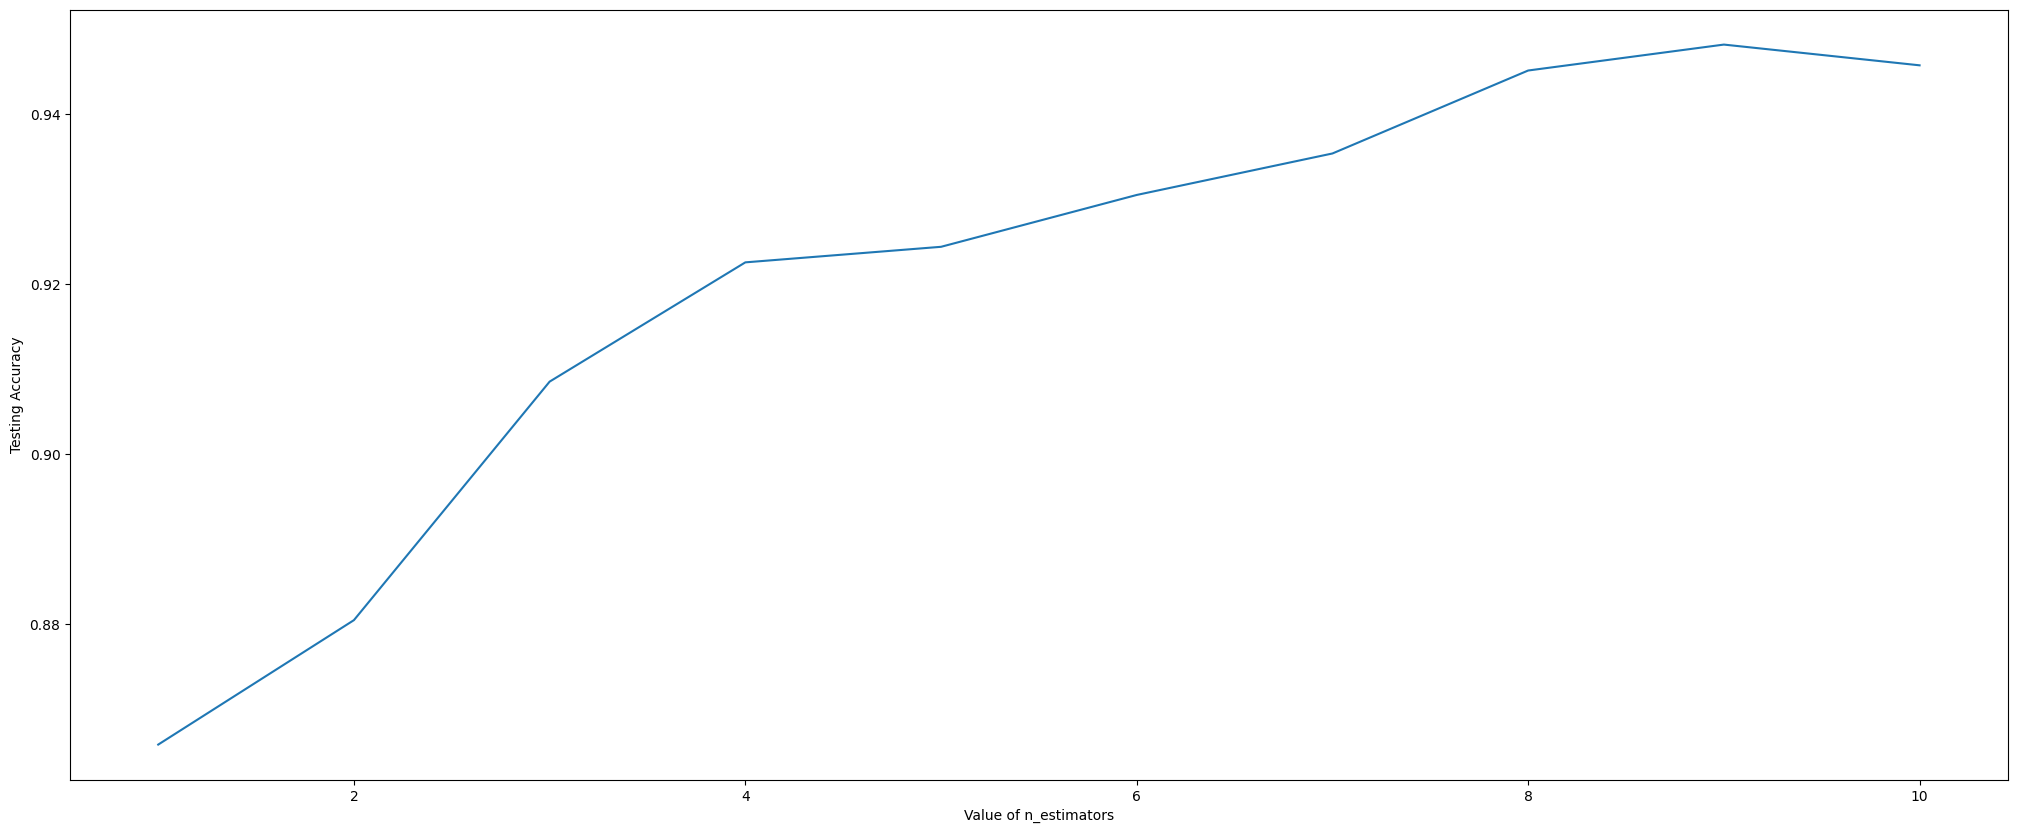

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=10
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.5887736424649176
2/30 round completed......................... Accurecy: 0.6632092739475289
3/30 round completed......................... Accurecy: 0.6931055521659548
4/30 round completed......................... Accurecy: 0.7419158023184869
5/30 round completed......................... Accurecy: 0.7840146430750458
6/30 round completed......................... Accurecy: 0.8230628431970713
7/30 round completed......................... Accurecy: 0.848078096400244
8/30 round completed......................... Accurecy: 0.8871262965222697
9/30 round completed......................... Accurecy: 0.9103111653447223
10/30 round completed......................... Accurecy: 0.9261744966442953
11/30 round completed......................... Accurecy: 0.9395973154362416
12/30 round completed......................... Accurecy: 0.9499694935936547
13/30 round completed......................... Accurecy: 0.951189749847468
14/30 round completed..

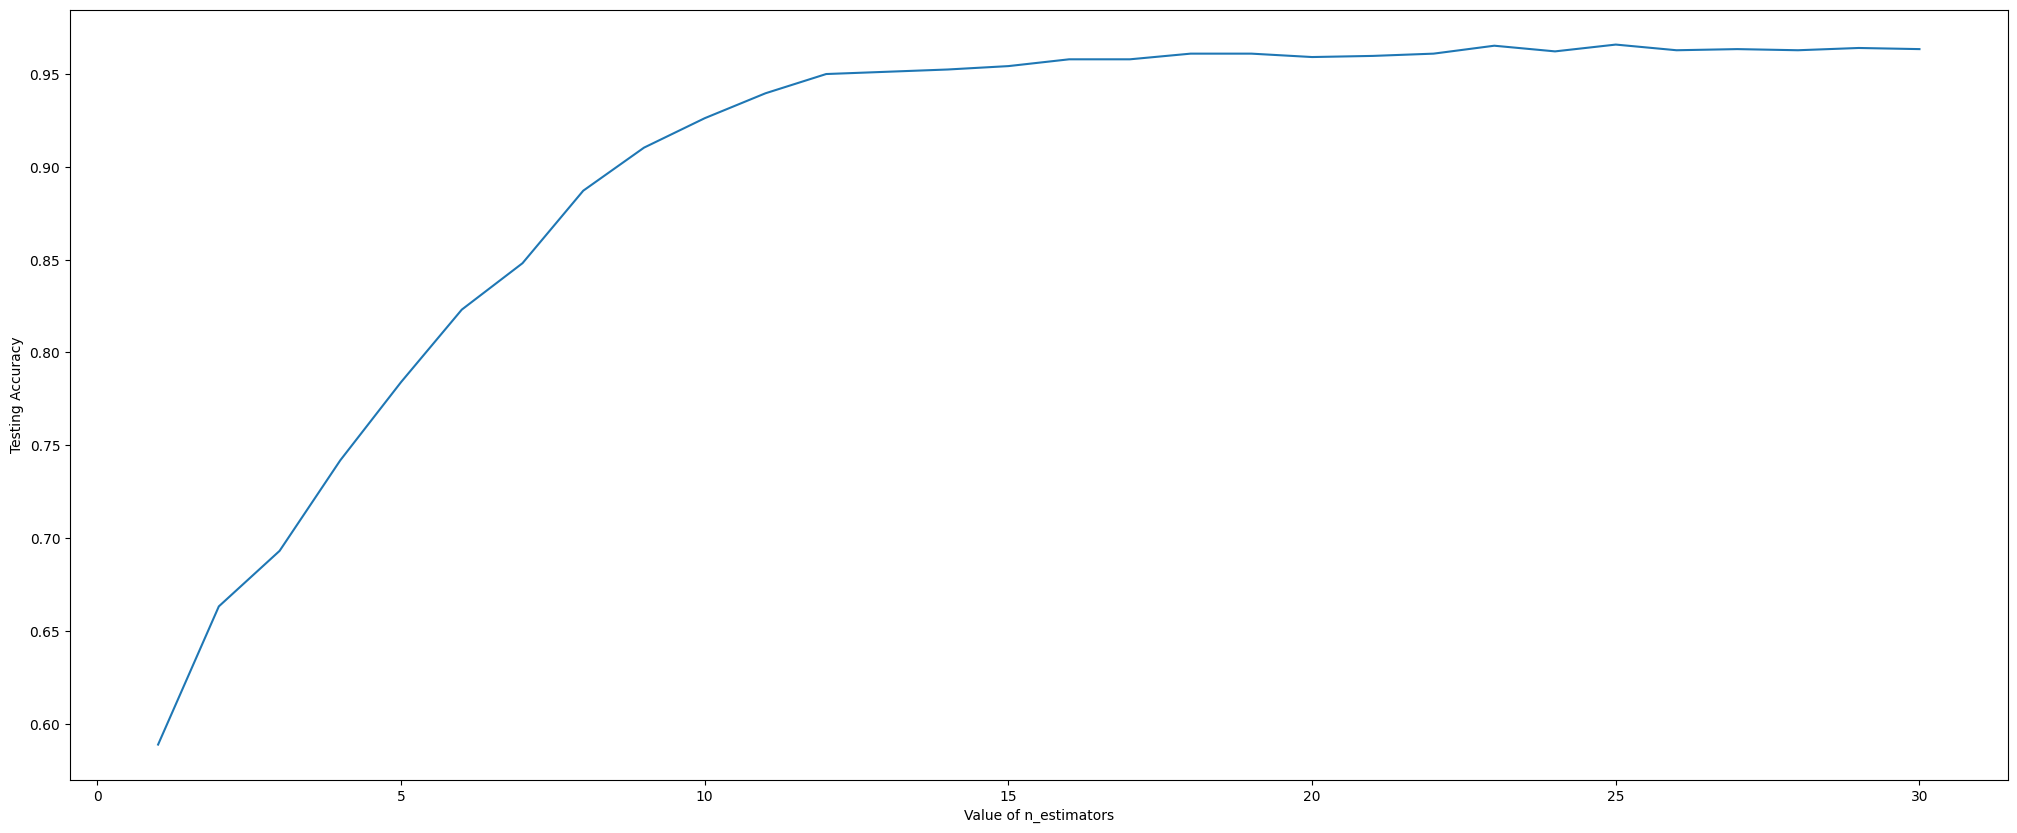

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[382   9   3   1]
 [  5 407   3   4]
 [  3  20 370  22]
 [  2   2  14 392]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       395
           1       0.93      0.97      0.95       419
           2       0.95      0.89      0.92       415
           3       0.94      0.96      0.95       410

    accuracy                           0.95      1639
   macro avg       0.95      0.95      0.95      1639
weighted avg       0.95      0.95      0.95      1639

Accurecy:  0.9463087248322147




---



---



#XGB

In [ ]:


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train.values,y_train.values)
y_pred = xgb_deafult.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[388   5   1   1]
 [  3 413   2   1]
 [  1   7 389  18]
 [  1   0   7 402]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       395
           1       0.97      0.99      0.98       419
           2       0.97      0.94      0.96       415
           3       0.95      0.98      0.97       410

    accuracy                           0.97      1639
   macro avg       0.97      0.97      0.97      1639
weighted avg       0.97      0.97      0.97      1639

Accurecy:  0.9713239780353874


1/10 round completed......................... Accurecy: 0.8328248932275778
2/10 round completed......................... Accurecy: 0.851738865161684
3/10 round completed......................... Accurecy: 0.8529591214154972
4/10 round completed......................... Accurecy: 0.8608907870652837
5/10 round completed......................... Accurecy: 0.8730933496034167
6/10 round completed......................... Accurecy: 0.8804148871262966
7/10 round completed......................... Accurecy: 0.8859060402684564
8/10 round completed......................... Accurecy: 0.8932275777913362
9/10 round completed......................... Accurecy: 0.896888346552776
10/10 round completed......................... Accurecy: 0.900549115314216
The best n_estimators:
10


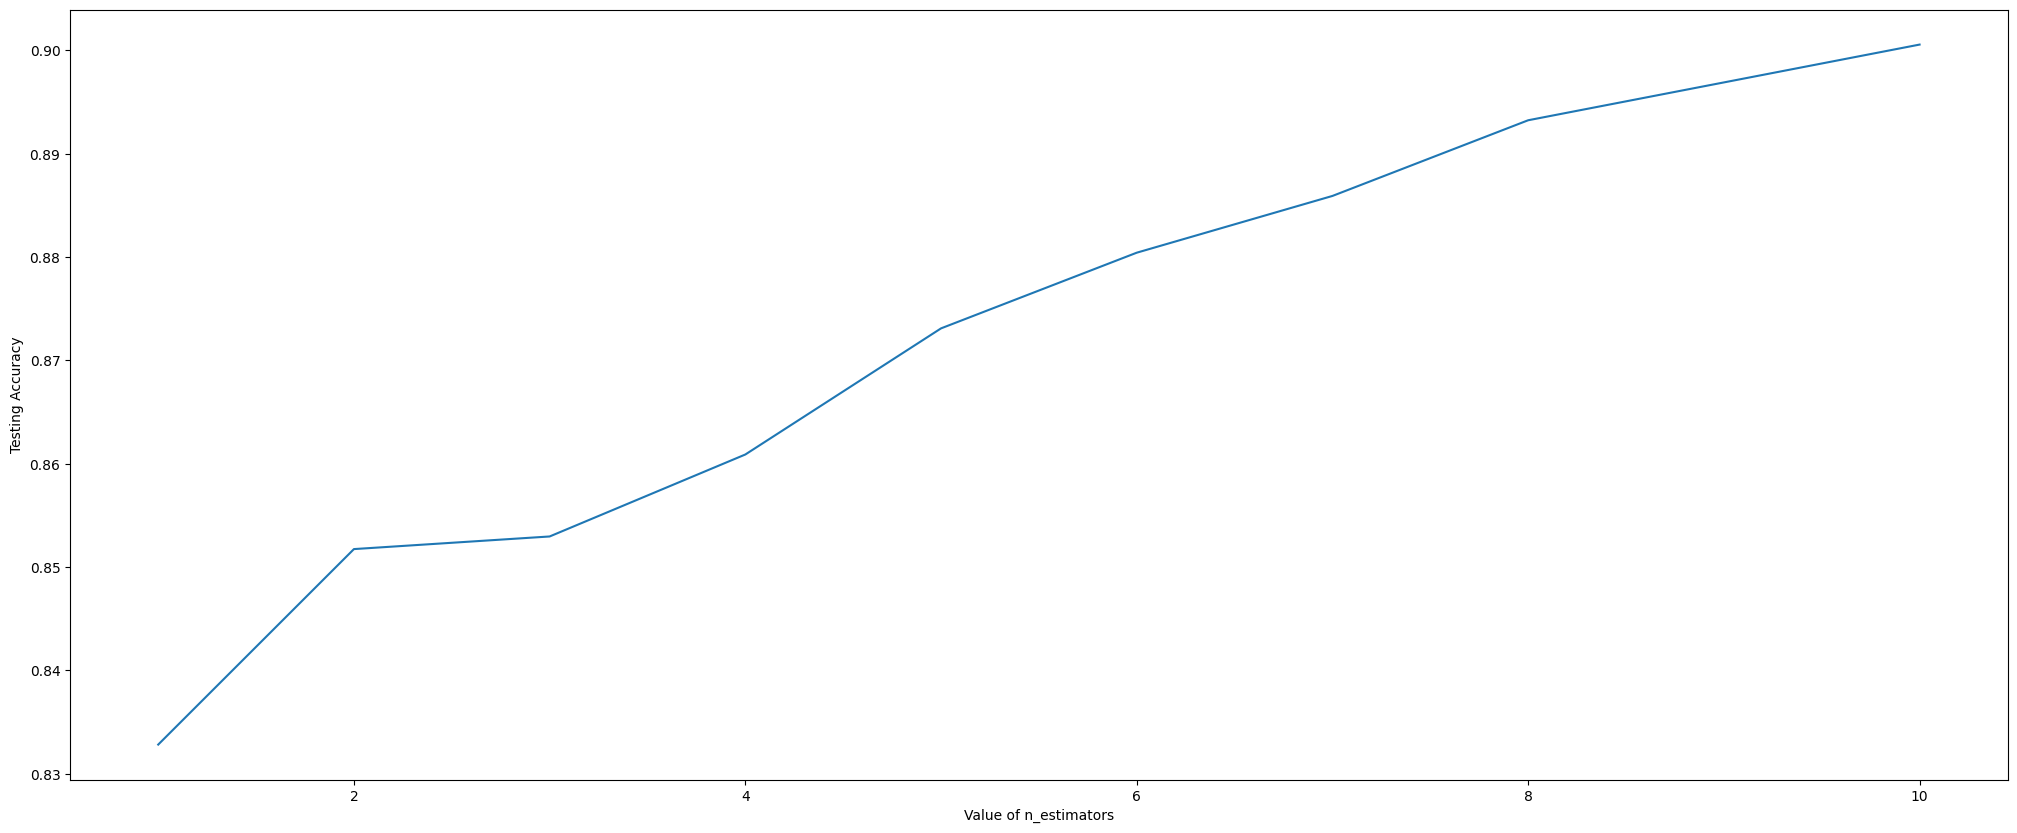

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=10
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)
  y_pred=xgb_classifier.predict(X_test.values)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.8090298962782184
2/30 round completed......................... Accurecy: 0.8889566809029896
3/30 round completed......................... Accurecy: 0.9395973154362416
4/30 round completed......................... Accurecy: 0.9658328248932275
5/30 round completed......................... Accurecy: 0.9682733374008542
6/30 round completed......................... Accurecy: 0.9713239780353874
7/30 round completed......................... Accurecy: 0.9664429530201343
8/30 round completed......................... Accurecy: 0.9713239780353874
9/30 round completed......................... Accurecy: 0.9694935936546675
10/30 round completed......................... Accurecy: 0.9670530811470409
11/30 round completed......................... Accurecy: 0.9676632092739476
12/30 round completed......................... Accurecy: 0.9658328248932275
13/30 round completed......................... Accurecy: 0.9664429530201343
14/30 round completed

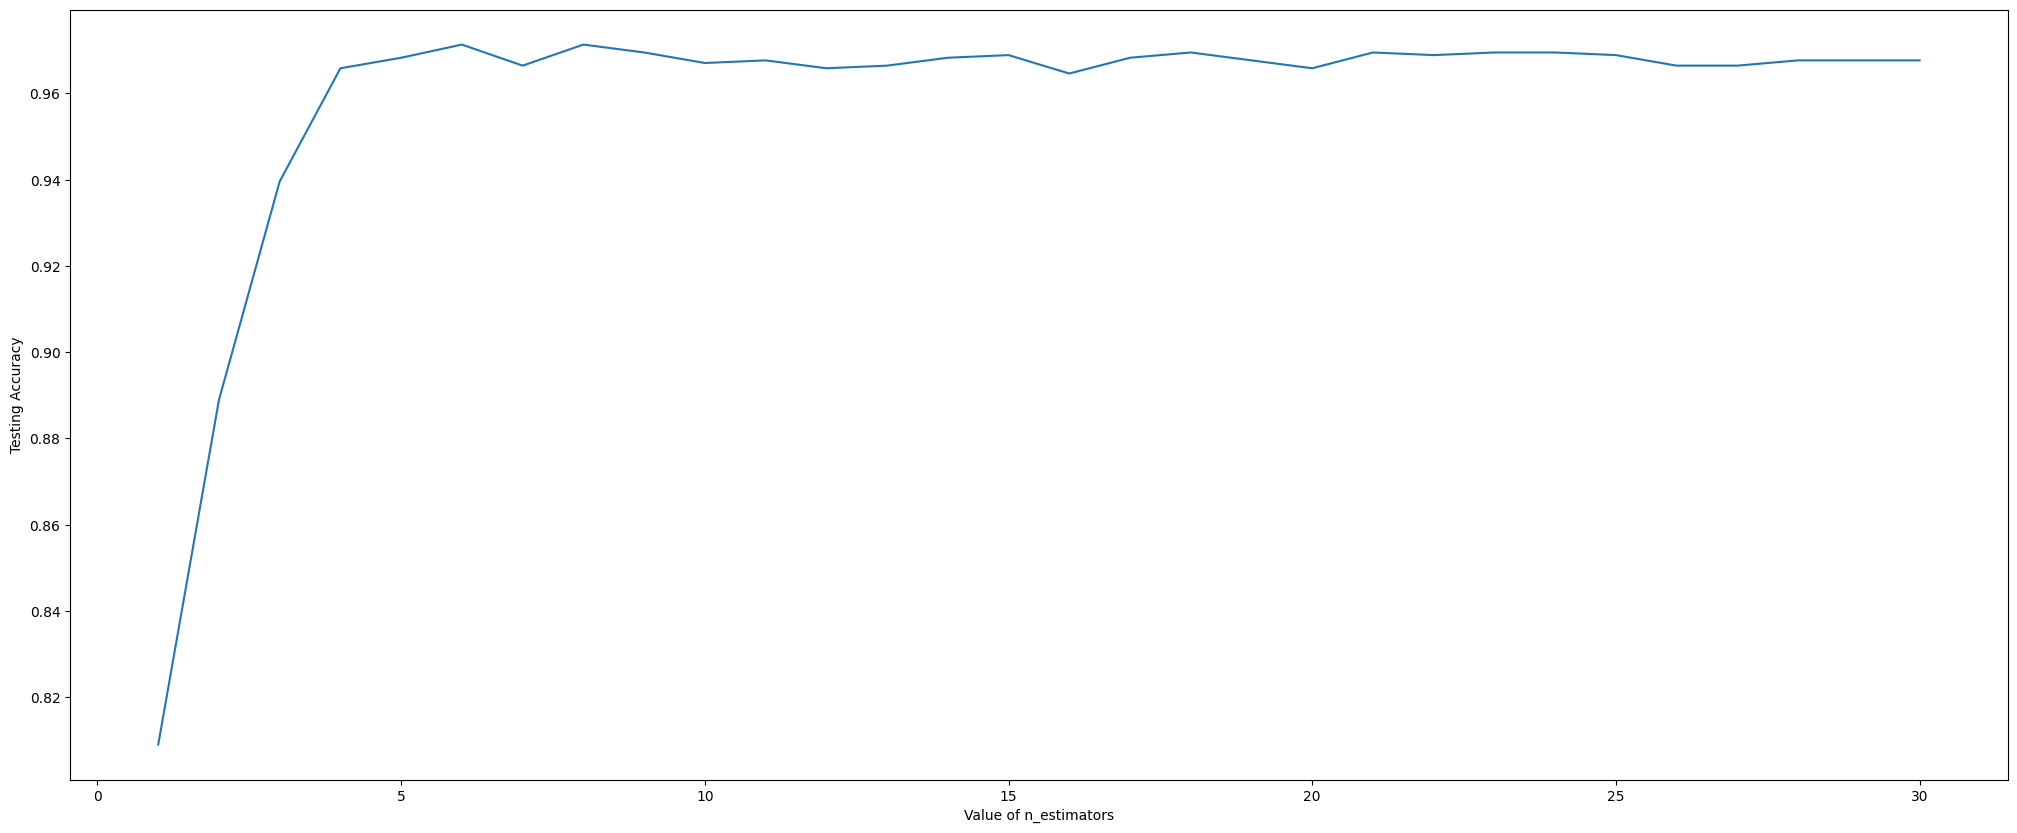

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)
  y_pred=xgb_classifier.predict(X_test.values)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train.values,y_train.values)
y_pred = xgb_depth.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[388   5   1   1]
 [  3 413   2   1]
 [  1   7 389  18]
 [  1   0   7 402]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       395
           1       0.97      0.99      0.98       419
           2       0.97      0.94      0.96       415
           3       0.95      0.98      0.97       410

    accuracy                           0.97      1639
   macro avg       0.97      0.97      0.97      1639
weighted avg       0.97      0.97      0.97      1639

Accurecy:  0.9713239780353874
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None

In [ ]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train.values,y_train.values)
y_pred = xgb_estimator.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[361  29   0   5]
 [  7 394   4  14]
 [  1  24 336  54]
 [  0  11  14 385]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       395
           1       0.86      0.94      0.90       419
           2       0.95      0.81      0.87       415
           3       0.84      0.94      0.89       410

    accuracy                           0.90      1639
   macro avg       0.91      0.90      0.90      1639
weighted avg       0.91      0.90      0.90      1639

Accurecy:  0.900549115314216
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None,

In [ ]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train.values,y_train.values)
y_pred = xgb_all.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[361  29   0   5]
 [  7 394   4  14]
 [  1  24 336  54]
 [  0  11  14 385]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       395
           1       0.86      0.94      0.90       419
           2       0.95      0.81      0.87       415
           3       0.84      0.94      0.89       410

    accuracy                           0.90      1639
   macro avg       0.91      0.90      0.90      1639
weighted avg       0.91      0.90      0.90      1639

Accurecy:  0.900549115314216


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[373  15   1   6]
 [ 10 394   3  12]
 [ 12  42 284  77]
 [  6   2  10 392]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       395
           1       0.87      0.94      0.90       419
           2       0.95      0.68      0.80       415
           3       0.80      0.96      0.87       410

    accuracy                           0.88      1639
   macro avg       0.89      0.88      0.88      1639
weighted avg       0.89      0.88      0.88      1639

Accurecy:  0.8804148871262966


1/105 round completed......................... Accurecy: 0.9273947528981086
2/105 round completed......................... Accurecy: 0.9090909090909091
3/105 round completed......................... Accurecy: 0.8913971934106162
4/105 round completed......................... Accurecy: 0.8944478340451495
5/105 round completed......................... Accurecy: 0.8804148871262966
6/105 round completed......................... Accurecy: 0.8767541183648566
7/105 round completed......................... Accurecy: 0.8651616839536302
8/105 round completed......................... Accurecy: 0.8590604026845637
9/105 round completed......................... Accurecy: 0.8419768151311775
10/105 round completed......................... Accurecy: 0.8425869432580841
11/105 round completed......................... Accurecy: 0.825503355704698
12/105 round completed......................... Accurecy: 0.8309945088468579
13/105 round completed......................... Accurecy: 0.8200122025625382
14/105 ro

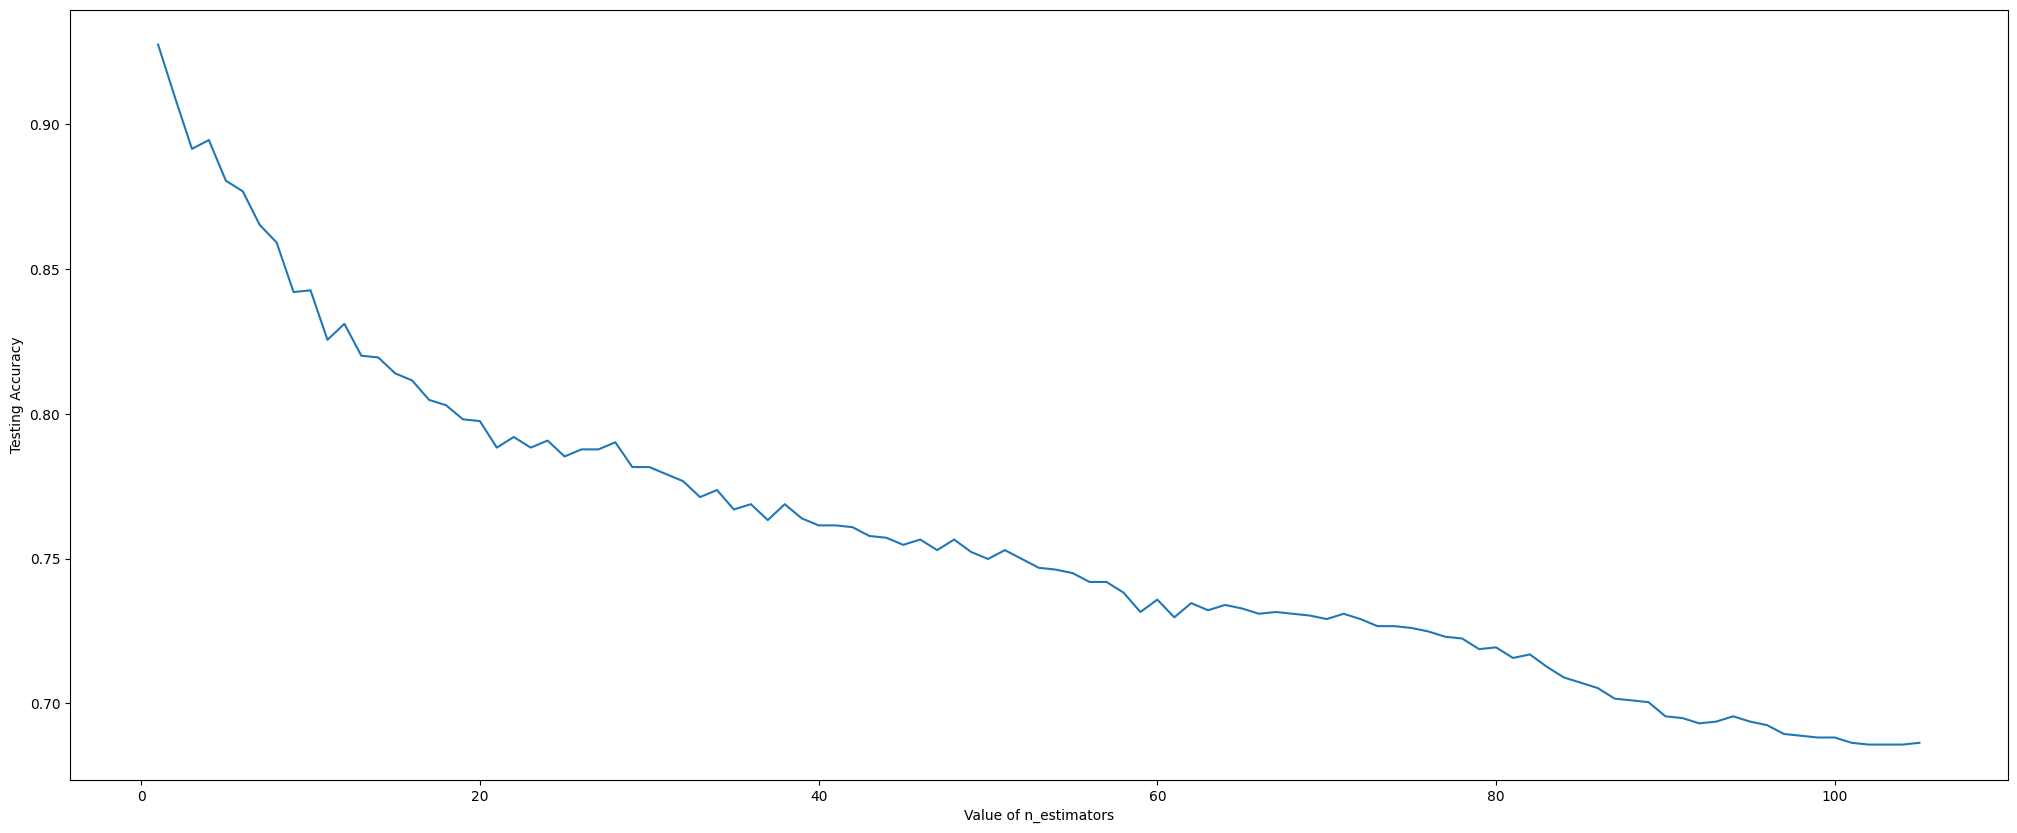

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[383  10   0   2]
 [  4 407   3   5]
 [  9  27 329  50]
 [  2   0   7 401]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       395
           1       0.92      0.97      0.94       419
           2       0.97      0.79      0.87       415
           3       0.88      0.98      0.92       410

    accuracy                           0.93      1639
   macro avg       0.93      0.93      0.93      1639
weighted avg       0.93      0.93      0.93      1639

Accurecy:  0.9273947528981086


#NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[280  99   1  15]
 [ 53 305  32  29]
 [  0  67 326  22]
 [  0 122 210  78]]
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       395
           1       0.51      0.73      0.60       419
           2       0.57      0.79      0.66       415
           3       0.54      0.19      0.28       410

    accuracy                           0.60      1639
   macro avg       0.62      0.60      0.58      1639
weighted avg       0.61      0.60      0.58      1639

Accurecy:  0.6034167175106773


#HistGradientBoostingClassifier

In [24]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc_daful = HistGradientBoostingClassifier()
hgbc_daful.fit(X_train,y_train)
y_pred = hgbc_daful.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hgbc_daful,7,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[385   7   2   1]
 [  0 415   4   0]
 [  1   4 391  19]
 [  0   3   2 405]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       395
           1       0.97      0.99      0.98       419
           2       0.98      0.94      0.96       415
           3       0.95      0.99      0.97       410

    accuracy                           0.97      1639
   macro avg       0.97      0.97      0.97      1639
weighted avg       0.97      0.97      0.97      1639

Accurecy:  0.9737644905430141


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=10
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = HistGradientBoostingClassifier(max_iter=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of max_iter')
plt.ylabel ('Testing Accuracy')



print("The best max_iter:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = HistGradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgbc_max_iter = HistGradientBoostingClassifier(max_iter=best_estimator,random_state=0)
hgbc_max_iter.fit(X_train, y_train)
y_pred=hgbc_max_iter.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hgbc_max_iter,7,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgbc_max_depth = HistGradientBoostingClassifier(max_depth=best_depth,random_state=0)
hgbc_max_depth.fit(X_train, y_train)
y_pred=hgbc_max_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hgbc_max_depth,7,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgbc_all = HistGradientBoostingClassifier(max_iter=best_estimator,max_depth=best_depth,random_state=0)
hgbc_all.fit(X_train, y_train)
y_pred=hgbc_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hgbc_all,7,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

#CatBoost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

cat_default = CatBoostClassifier()
cat_default.fit(X_train,y_train)
y_pred = cat_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(cat_default,8,'CatBoostClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
N=10
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = CatBoostClassifier(iterations=k)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of iterations')
plt.ylabel ('Testing Accuracy')



print("The best iterations:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = CatBoostClassifier(depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from catboost import CatBoostClassifier

cat_iterations = CatBoostClassifier(iterations=best_estimator)
cat_iterations.fit(X_train,y_train)
y_pred = cat_iterations.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(cat_iterations,8,'CatBoostClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from catboost import CatBoostClassifier

cat_depth = CatBoostClassifier(depth=best_depth)
cat_depth.fit(X_train,y_train)
y_pred = cat_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(cat_depth,8,'CatBoostClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from catboost import CatBoostClassifier

cat_all = CatBoostClassifier(iterations=best_estimator,depth=best_depth)
cat_all.fit(X_train,y_train)
y_pred = cat_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(cat_all,8,'CatBoostClassifier')]=accuracy_score(y_test, y_pred)



---



---



#Result

In [ ]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()


AdaBoostClassifier(random_state=0) 1  :  0.6156192800488103
---------------------------------------------------------------

AdaBoostClassifier(n_estimators=3, random_state=0) 1  :  0.6217205613178768
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0) 2  :  0.8993288590604027
---------------------------------------------------------------

GradientBoostingClassifier(n_estimators=25, random_state=0) 2  :  0.8157413056741916
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=10, random_state=0) 2  :  0.9658328248932275
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=10, n_estimators=25, random_state=0) 2  :  0.9432580841976815
---------------------------------------------------------------

RandomForestClassifier(random_state=0) 3  :  0.963392312385601
---------------------------------------------------------------

RandomForest

In [ ]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


(XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...), 4, 'xgboost')   :  0.9713239780353874
-------------------------------------------------------------------------------------------------
(XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, c

In [ ]:
print("best_models:")
for i in best_models:
  print(i)


best_models:
(XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...), 'xgboost')
(GradientBoostingClassifier(max_depth=10, random_state=0), 'GradientBoostingClassifier')
(RandomForestClassifier(max_depth=25, random_state=0), 'RandomForestClassifier')
(KNeighborsClassifier(n_neighbors=1), 'KNei

In [ ]:
len(best_models)

4

#Performance parameter for each class

In [ ]:

def confusion_details(y_test,y_pred):
    labels = list(set(y_test))
    labels.sort()

    print("Total labels: %s -> %s" % (len(labels), labels))

    df = pd.DataFrame(
        data=confusion_matrix(y_test, y_pred, labels=labels),
        columns=labels,
        index=labels
    )

    print(df)

    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Local (metrics per class)
    #
    tps = {}
    fps = {}
    fns = {}
    tns = {}

    precision_local = {}
    recall_local = {}
    f1_local = {}
    accuracy_local = {}
    specificity_local={}

    for label in labels:
        tps[label] = df.loc[label, label]
        fps[label] = df[label].sum() - tps[label]
        fns[label] = df.loc[label].sum() - tps[label]
        tns[label]=len(y_test) - (tps[label] + fps[label] + fns[label])

        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]

        precision_local[label] = tp / (tp + fp) if (tp + fp) > 0. else 0.
        specificity_local[label] = tn / (tn + fp) if (tn + fp) > 0. else 0.
        recall_local[label] = tp / (tp + fn) if (tp + fp) > 0. else 0.
        p, r = precision_local[label], recall_local[label]

        f1_local[label] = 2. * p * r / (p + r) if (p + r) > 0. else 0.
        accuracy_local[label] = tp / (tp + fp + fn) if (tp + fp + fn) > 0. else 0.



    print("#-- Local measures --#")
    print("True Positives(TP):", tps)
    print("False Positives(FP):", fps)
    print("True Negatives(TN):", tns)
    print("False Negatives(FN):", fns)
    print("----------------------------")

    print("Precision:", precision_local)
    print("Recall/Sensitivity:", recall_local)
    print("Specificity:",specificity_local)
    print("F1-Score:", f1_local)
    print("Accuracy:", accuracy_local)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Global
    #
    micro_averages = {}
    macro_averages = {}

    correct_predictions = sum(tps.values())
    true_negative=sum(tns.values())

    den = sum(list(tps.values()) + list(fps.values()))
    micro_averages["Precision"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tps.values()) + list(fns.values()))
    micro_averages["Recall"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tns.values()) + list(fps.values()))
    micro_averages["Specificity"] = 1. * true_negative / den if den > 0. else 0.


    micro_avg_p, micro_avg_r = micro_averages["Precision"], micro_averages["Recall"]
    micro_averages["F1-score"] = 2. * micro_avg_p * micro_avg_r / (micro_avg_p + micro_avg_r) if (micro_avg_p + micro_avg_r) > 0. else 0.

    macro_averages["Precision"] = np.mean(list(precision_local.values()))
    macro_averages["Recall"] = np.mean(list(recall_local.values()))
    macro_averages["Specificity"]=np.mean(list(specificity_local.values()))


    macro_avg_p, macro_avg_r = macro_averages["Precision"], macro_averages["Recall"]
    macro_averages["F1-Score"] = 2. * macro_avg_p * macro_avg_r / (macro_avg_p + macro_avg_r) if (macro_avg_p + macro_avg_r) > 0. else 0.

    total_predictions = df.values.sum()
    accuracy_global = correct_predictions / total_predictions if total_predictions > 0. else 0.

    print("#-- Global measures --#")
    print("Micro-Averages:", micro_averages)
    print("Macro-Averages:", macro_averages)
    print("Correct predictions:", correct_predictions)
    print("Total predictions:", total_predictions)
    print("Accuracy:", accuracy_global)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()



    accuracy_local_new = {}
    for label in labels:
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        accuracy_local_new[label] = (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0. else 0.

    total_true = sum(list(tps.values()) + list(tns.values()))
    total_predictions = sum(list(tps.values()) + list(tns.values()) + list(fps.values()) + list(fns.values()))
    accuracy_global_new = 1. * total_true / total_predictions if total_predictions > 0. else 0.

    print("Accuracy (per class), with TNs:", accuracy_local_new)
    print("Accuracy (per class), without TNs:", accuracy_local)
    print("Accuracy (global), with TNs:", accuracy_global_new)
    print("Accuracy (global), without TNs:", accuracy_global)

In [ ]:
new_keys_10=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=3, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=25, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=10, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=10, n_estimators=25, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=9, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=25, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=25, n_estimators=9, random_state=0)', inde…

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:
for i in range(len(new_keys_10)):
  if new_keys_10[i].value ==True:
    print("\n")
    print("_________________________________________________",models[i],"_______________________________________________")

    if str(models[i])[:3] == "XGB":
      y_pred = models[i].predict(X_test.values)
      confusion_details(y_test,y_pred)

    else:
      y_pred = models[i].predict(X_test)
      confusion_details(y_test,y_pred)
    print('\n')
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print('\n')
    print('\n')

#Testing Accuracy For Best 4 Models

In [ ]:

for i in best_models:
  print("--------------------------------------------------")
  print()
  if str(i[0])[:3] == "XGB":
    y_pred=i[0].predict(X_test.values)
  else:
    y_pred=i[0].predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test,y_pred))
  print("Accurecy: ",accuracy_score(y_test, y_pred))

--------------------------------------------------

[[388   5   1   1]
 [  3 413   2   1]
 [  1   7 389  18]
 [  1   0   7 402]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       395
           1       0.97      0.99      0.98       419
           2       0.97      0.94      0.96       415
           3       0.95      0.98      0.97       410

    accuracy                           0.97      1639
   macro avg       0.97      0.97      0.97      1639
weighted avg       0.97      0.97      0.97      1639

Accurecy:  0.9713239780353874
--------------------------------------------------

[[384   8   1   2]
 [  2 412   4   1]
 [  1   8 383  23]
 [  0   2   4 404]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       395
           1       0.96      0.98      0.97       419
           2       0.98      0.92      0.95       415
           3       0.94      0.99      0.96       410

    a

#SHAP

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.8 MB/s eta 0:00:00


In [ ]:

def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer(X_test)
  features_names=list_of_feat

  if 'Subjects' in features_names:
    features_names.pop(0)


  shap.plots.bar(shap_values1,max_display=graph_feat["max_display"])

  print("---------------------")

  shap.summary_plot(shap_values1,max_display=graph_feat["max_display"],feature_names=features_names)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


  print("---------------------")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])

In [ ]:
new_keys_7=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=3, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=25, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=10, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=10, n_estimators=25, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=9, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=25, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=25, n_estimators=9, random_state=0)', inde…

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:
graph_feat={
    "max_display":20,
    "shap_values Index":2
}

for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Confusion Matrix For Testing

In [ ]:
def Conf_Mat(X_,y_,attb,keys):

  import matplotlib.pyplot as plt
  from yellowbrick.classifier import ConfusionMatrix
  import matplotlib.dates as dates

  fig = plt.figure(figsize=(attb["Fig Height"],attb["Fig weidth"]))
  ax = fig.add_subplot(111)


  for i in range(len(keys)):
    if keys[i].value ==True:
      cm = ConfusionMatrix(models[i], classes=['Reading', 'Resting', 'Walking', 'Working'],fontsize=attb["Confusion Matrix Inner Fontsize"],ax=ax)

      if str(models[i])[:3] == "XGB":
        cm.fit(X_train.values, y_train.values)
        cm.score(X_.values, y_.values)
      else:
        cm.fit(X_train, y_train)
        cm.score(X_, y_)

      cm.ax.set_xlabel("Predicted Class", fontsize=attb["X Axis Fontsize"],fontweight="bold")
      cm.ax.set_ylabel("True Class", fontsize=attb["Y Axis Fontsize"],fontweight="bold")
      cm.ax.xaxis.set_tick_params(labelsize=attb["X Label Fontsize"])
      cm.ax.yaxis.set_tick_params(labelsize=attb["Y Label Fontsize"])
      for label in ax.get_xticklabels():
        label.set_fontweight(550)
      for label in ax.get_yticklabels():
        label.set_fontweight(550)

      plt.savefig(attb["type"]+"_Confusion_mat("+str(models[i])+").png")
      cm.show()
      print("--------------------")
      print("--------------------")

In [ ]:
new_keys_6=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=3, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=25, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=10, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=10, n_estimators=25, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=9, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=25, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=25, n_estimators=9, random_state=0)', inde…

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

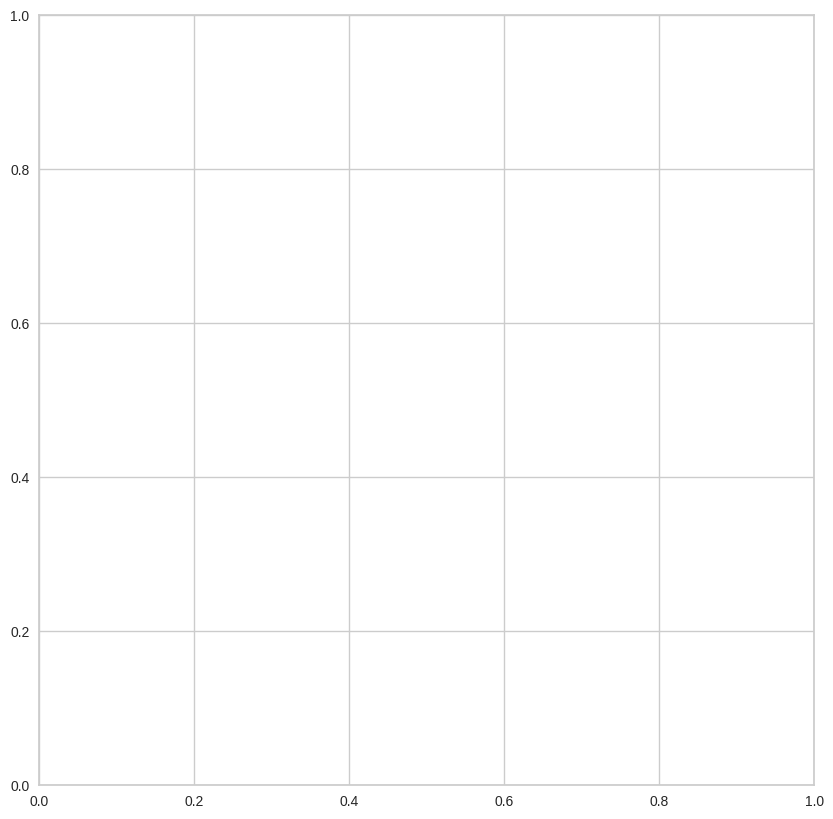

In [ ]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10,

  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18,
  "type"  : "Testing"

}

Conf_Mat(X_test,y_test,attributes,new_keys_6)

#Confusion Matrix for Testing ( with Percent)

In [ ]:
def Conf_Mat_percent(X_,y_,attb,keys):

  import matplotlib.pyplot as plt
  from yellowbrick.classifier import ConfusionMatrix
  import matplotlib.dates as dates

  fig = plt.figure(figsize=(attb["Fig Height"],attb["Fig weidth"]))
  ax = fig.add_subplot(111)


  for i in range(len(keys)):
    if keys[i].value ==True:
      cm = ConfusionMatrix(models[i], classes=['Reading', 'Resting', 'Walking', 'Working'],fontsize=attb["Confusion Matrix Inner Fontsize"],ax=ax,percent=True)

      if str(models[i])[:3] == "XGB":
        cm.fit(X_train.values, y_train.values)
        cm.score(X_.values, y_.values)
      else:
        cm.fit(X_train, y_train)
        cm.score(X_, y_)

      cm.ax.set_xlabel("Predicted Class", fontsize=attb["X Axis Fontsize"],fontweight="bold")
      cm.ax.set_ylabel("True Class", fontsize=attb["Y Axis Fontsize"],fontweight="bold")
      cm.ax.xaxis.set_tick_params(labelsize=attb["X Label Fontsize"])
      cm.ax.yaxis.set_tick_params(labelsize=attb["Y Label Fontsize"])
      for label in ax.get_xticklabels():
        label.set_fontweight(550)
      for label in ax.get_yticklabels():
        label.set_fontweight(550)

      plt.savefig(attb["type"]+"_Confusion_mat("+str(models[i])+").png")
      cm.show()
      print("--------------------")
      print("--------------------")

In [ ]:
new_keys_20=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=3, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=25, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=10, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=10, n_estimators=25, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=9, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=25, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=25, n_estimators=9, random_state=0)', inde…

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

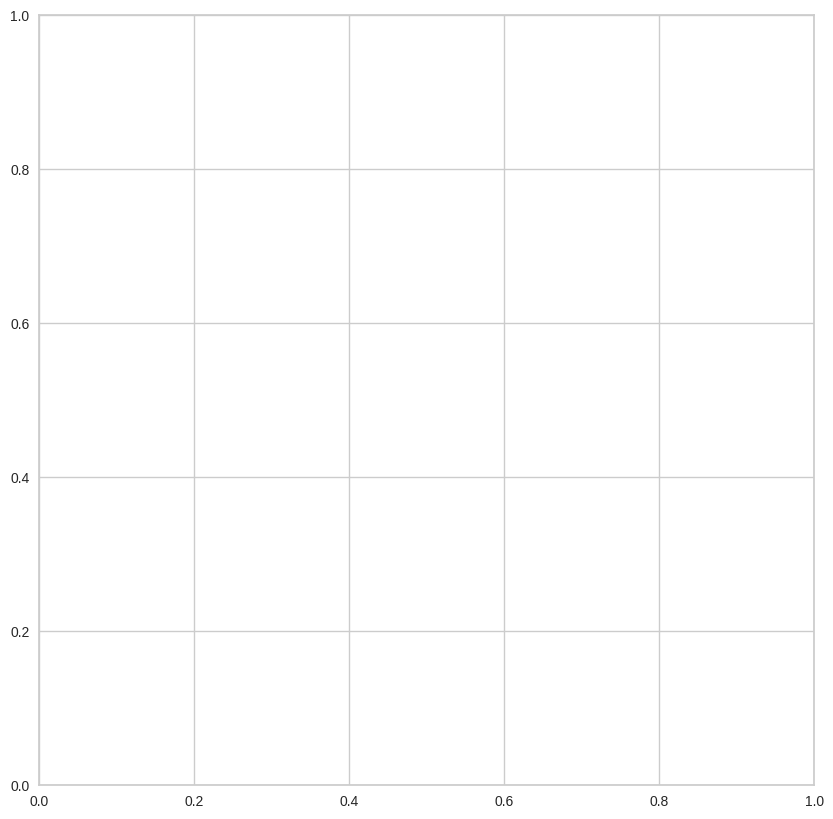

In [ ]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10,

  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18,
  "type"  : "Training"

}

Conf_Mat_percent(X_test,y_test,attributes,new_keys_20)

#Confusion Matrix For Training

In [ ]:
new_keys_5=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=3, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=25, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=10, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=10, n_estimators=25, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=9, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=25, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=25, n_estimators=9, random_state=0)', inde…

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

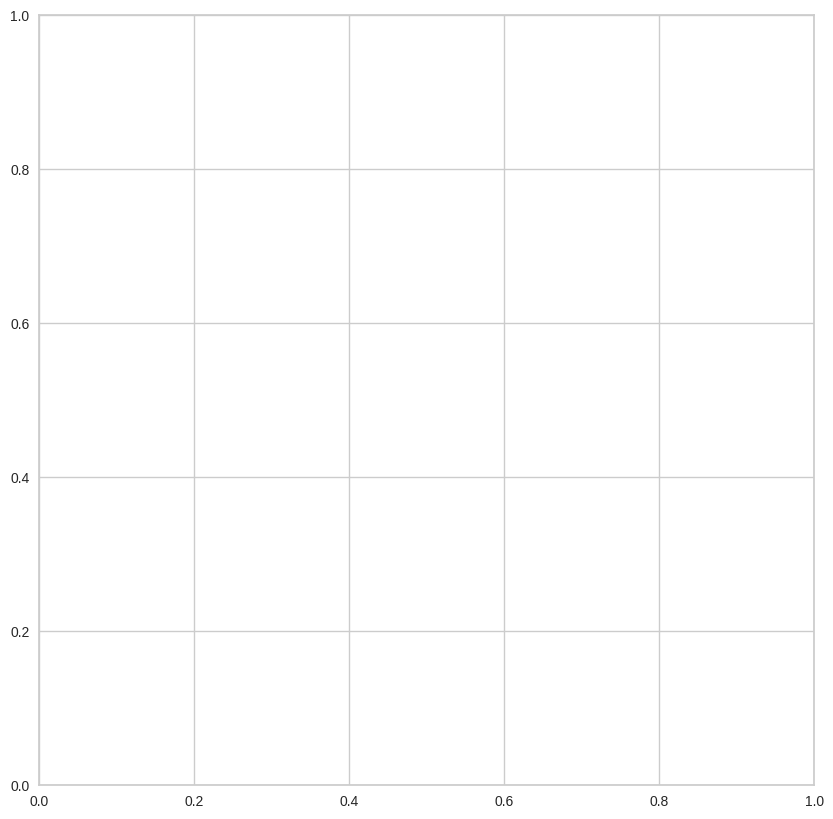

In [ ]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10,

  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18,
  "type"  : "Training"

}

Conf_Mat(X_train,y_train,attributes,new_keys_5)

#Confusion Matrix for Training ( with Percent)

In [ ]:
new_keys_21=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=3, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=25, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=10, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=10, n_estimators=25, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=9, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=25, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=25, n_estimators=9, random_state=0)', inde…

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

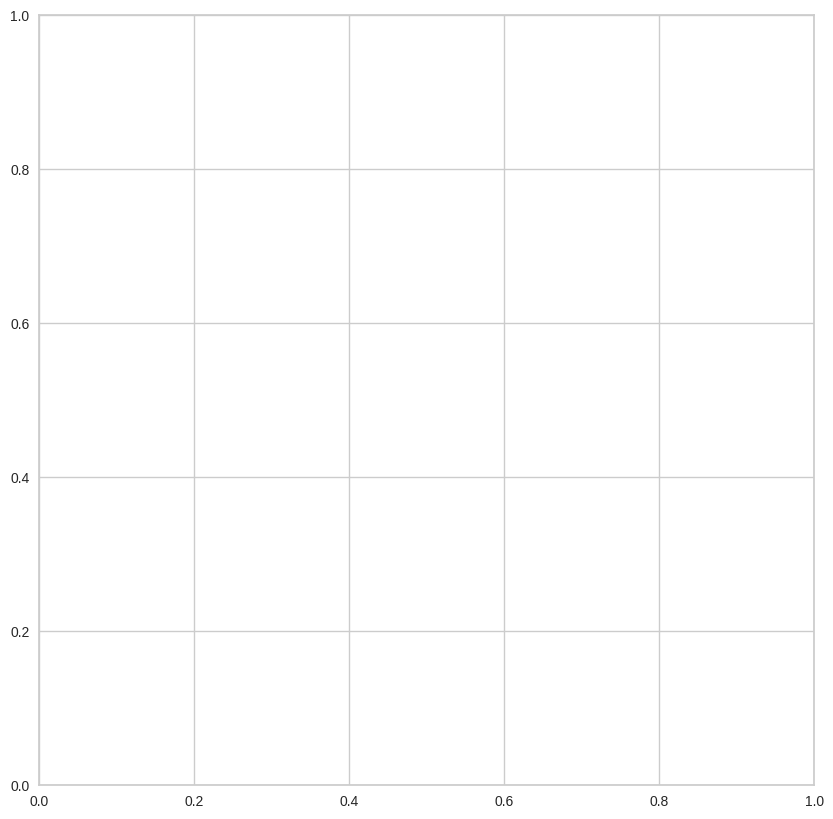

In [ ]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10,

  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18,
  "type"  : "Training"

}

Conf_Mat_percent(X_train,y_train,attributes,new_keys_21)

#ROC FOR MULTICLASS

In [ ]:
!pip install plotly==5.11.0
!pip install -U kaleido


import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

def ploty_ROC(model,X,y,fig_name,graph_attributes):

    lebel_dict={
    0: 'Reading',
    1: 'Resting',
    2: 'Walking',
    3: 'Working'
    }
    if str(model)[:3] == "XGB":
      y_scores = model.predict_proba(X.values)
    else:
      y_scores = model.predict_proba(X)
    #y_scores = model.predict_proba(X)

    y_onehot = pd.get_dummies(y, columns=model.classes_)

    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash', width=5),
        x0=0, x1=1, y0=0, y1=1
    )

    for i in range(y_scores.shape[1]):
        y_true = y_onehot.iloc[:, i]
        y_score = y_scores[:, i]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)
        name = f"{lebel_dict[y_onehot.columns[i]]} (AUC={auc_score:.2f})"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

    fig.update_layout(
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=1000, height=1000,
        font=dict(
            family="Arial Black, monospace",
            size=graph_attributes["Font Size"],
            color=graph_attributes["Font Color"]
        ),
        legend=dict(
            x=0.62,
            y=0.05,
            traceorder="reversed",
            title_font_family="Arial Black",
            font=dict(
                family="Arial Black, monospace",
                size=graph_attributes["Legend Font Size"],
                color=graph_attributes["Legend Font Color"]
            ),
            bgcolor=graph_attributes["Legend bgcolor"],
            bordercolor=graph_attributes["Legend bordercolor"],
            borderwidth=graph_attributes["Legend borderwidth"]
        ),
        #plot_bgcolor="",
    )
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', tickfont_family="Arial Black")
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black',tickfont_family="Arial Black")

    fig.show()
    fig.write_image(fig_name+".png")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 8.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00


In [ ]:
new_keys_9=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=3, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=25, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=10, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=10, n_estimators=25, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=9, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=25, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=25, n_estimators=9, random_state=0)', inde…

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:

#Change the attriutes for graph
graph_attributes={
    "Font Size"  : 25,
    "Font Color" : "black",
    "Legend Font Size"  : 25,
    "Legend Font Color" : "black",
    "Legend bgcolor"    : "LightSteelBlue",
    "Legend bordercolor": "White",
    "Legend borderwidth": 1

}



for i in range(len(new_keys_9)):
  if new_keys_9[i].value ==True:
    print(models[i])
    fig1=ploty_ROC(models[i],X_train,y_train,str(models[i]),graph_attributes)
    fig2=ploty_ROC(models[i],X_test,y_test,str(models[i]),graph_attributes)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Cross_val_score function

In [ ]:
from sklearn.model_selection import cross_val_score

k=5
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new, y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")

AdaBoostClassifier(random_state=0)  -> Accuracy:  0.6156192800488103
AdaBoostClassifier(random_state=0)  -> AVG Accurecy After CV: 0.624027575705428 (For 5 Fold)
--------------------------------------------------------------------------
AdaBoostClassifier(n_estimators=3, random_state=0)  -> Accuracy:  0.6217205613178768
AdaBoostClassifier(n_estimators=3, random_state=0)  -> AVG Accurecy After CV: 0.6251196231062003 (For 5 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(random_state=0)  -> Accuracy:  0.8993288590604027
GradientBoostingClassifier(random_state=0)  -> AVG Accurecy After CV: 0.9013658973390516 (For 5 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(n_estimators=25, random_state=0)  -> Accuracy:  0.8157413056741916
GradientBoostingClassifier(n_estimators=25, random_state=0)  -> AVG Accurecy After CV: 0.8173788925466777 (For 5 Fold)
--------------------------

# **LIME**

In [ ]:
!pip install lime

In [ ]:

  def LIME_EXP(model,row):
    import lime
    from lime import lime_tabular


    if str(model)[:3] == "XGB":

      """explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=list(list(X_new.columns)),
        class_names=['Reading', 'Resting', 'Walking', 'Working']
        )

      exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 model.predict_proba,
                                 num_features=6,
                                 top_labels=2)"""
      print("Plz RUN XGboost cell....")
      return None



    else:
      explainer = lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train),
        feature_names=list(X_new.columns),
        class_names=['Reading', 'Resting', 'Walking', 'Working'],
        mode='classification'
        )

      exp = explainer.explain_instance(X_test.iloc[row],
                                      model.predict_proba,
                                      num_features=6,
                                      top_labels=4)



    exp.show_in_notebook(show_table=True, show_all=True)



    import matplotlib.pyplot as plt
    with plt.style.context("ggplot"):
        exp.as_pyplot_figure()


    from IPython.display import HTML
    html_data = exp.as_html()
    HTML(data=html_data)

    exp.save_to_file(str(model)+".html")

In [ ]:
row = int(input("Enter the index of row to explain: "))      # the index of row to be explained in LIME


new_keys_8=models_check_box(models)

In [ ]:
for i in range(len(new_keys_8)):
  if new_keys_8[i].value ==True:
    print(models[i])
    LIME_EXP(models[i],row)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

### LIME for XGboost

In [ ]:
row = 18  ## the index of row to be explained in LIME

import lime
from lime import lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=list(list(X_new.columns)),
                                                   class_names=['Reading', 'Resting', 'Walking', 'Working'])

####Default

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_deafult.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_deafult)+".html")

####Best Max Depth

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_depth.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_depth)+".html")

####Best N Estimator

In [ ]:


exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_estimator.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_estimator)+".html")

####Best Depth and Best Estimator

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_all.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)


import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_all)+".html")